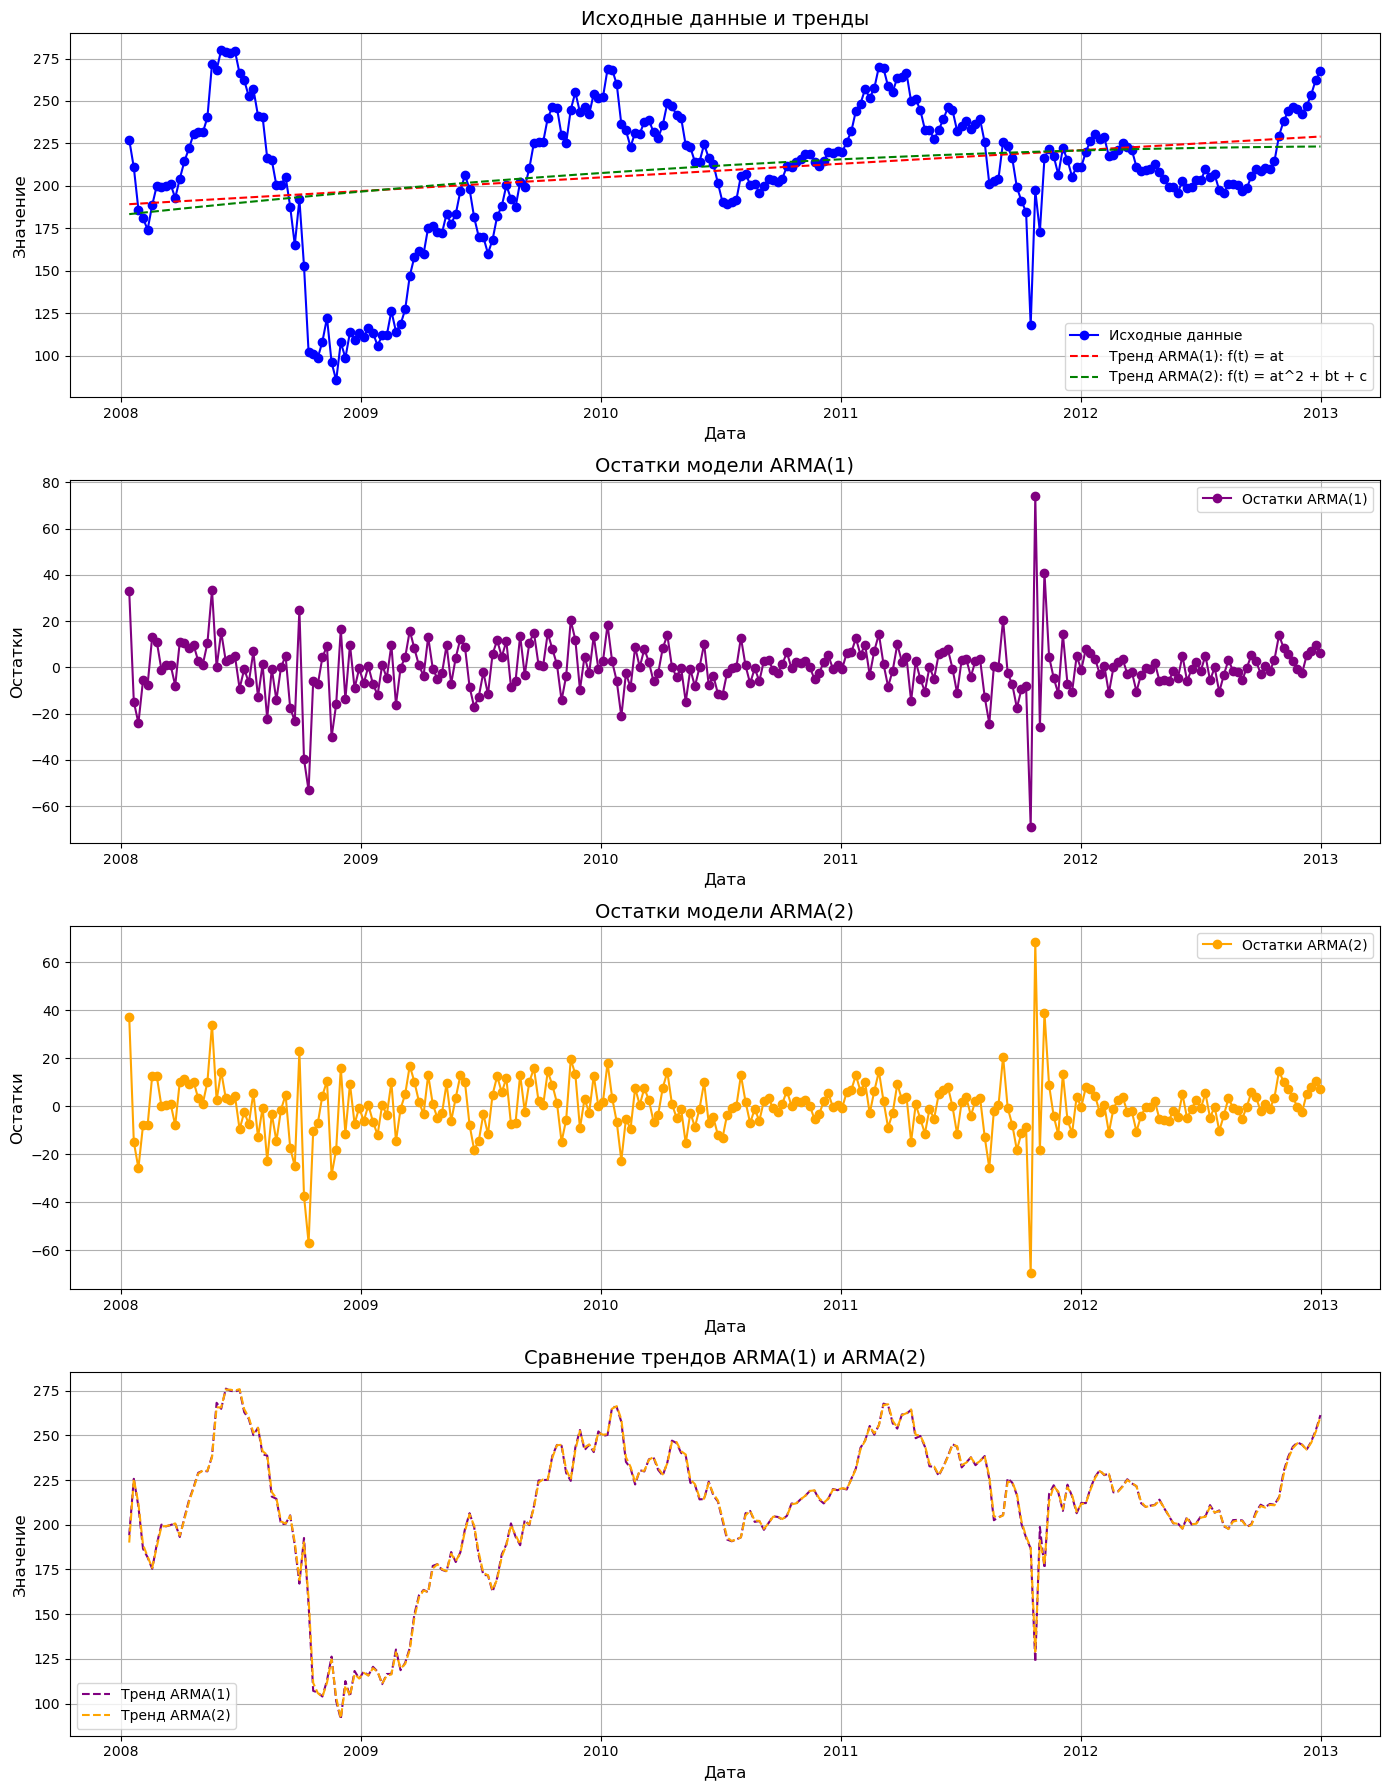

Коэффициент phi для ARMA(1): 0.9505123307947264
Коэффициенты phi_1 и phi_2 для ARMA(2): 0.8606188113985255, 0.09533311661480436


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import Polynomial

file_path = 'лаба.xlsx' 
data = pd.read_excel(file_path, skiprows=2)
data = data.rename(columns=lambda x: str(x).strip())

data['Дата'] = pd.to_datetime(data['Дата'], dayfirst=True)
data.set_index('Дата', inplace=True)

weekly_data = data['Роснефть'].resample('W-MON').mean()
weekly_data.interpolate(method='linear', inplace=True)

t = np.arange(1, len(weekly_data) + 1)

# ARMA(1): f(t) = at (линейный тренд)
lin_reg = LinearRegression()
lin_reg.fit(t.reshape(-1, 1), weekly_data.values.flatten())
arma1_trend = lin_reg.predict(t.reshape(-1, 1))
arma1_model = ARIMA(weekly_data.values.flatten() - arma1_trend, order=(1, 0, 0))
arma1_fit = arma1_model.fit()
phi = arma1_fit.arparams[0]

# ARMA(2): f(t) = at^2 + bt + c (квадратичный тренд)
poly_reg = Polynomial.fit(t, weekly_data.values.flatten(), deg=2)
arma2_trend = poly_reg(t)
arma2_model = ARIMA(weekly_data.values.flatten() - arma2_trend, order=(2, 0, 0))
arma2_fit = arma2_model.fit()
phi_1, phi_2 = arma2_fit.arparams

plt.figure(figsize=(14, 18))

plt.subplot(4, 1, 1)
plt.plot(weekly_data.index, weekly_data.values.flatten(), label='Исходные данные', color='blue', marker='o')
plt.plot(weekly_data.index, arma1_trend, label='Тренд ARMA(1): f(t) = at', color='red', linestyle='--')
plt.plot(weekly_data.index, arma2_trend, label='Тренд ARMA(2): f(t) = at^2 + bt + c', color='green', linestyle='--')
plt.title('Исходные данные и тренды', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
arma1_resid = arma1_fit.resid
arma1_resid_index = weekly_data.index[:len(arma1_resid)]
plt.plot(arma1_resid_index, arma1_resid, label='Остатки ARMA(1)', color='purple', marker='o')
plt.title('Остатки модели ARMA(1)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
arma2_resid = arma2_fit.resid
arma2_resid_index = weekly_data.index[:len(arma2_resid)]
plt.plot(arma2_resid_index, arma2_resid, label='Остатки ARMA(2)', color='orange', marker='o')
plt.title('Остатки модели ARMA(2)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
arma1_fitted = arma1_fit.fittedvalues + arma1_trend[:len(arma1_fit.fittedvalues)]
arma1_fitted_index = weekly_data.index[:len(arma1_fitted)]
plt.plot(arma1_fitted_index, arma1_fitted, label='Тренд ARMA(1)', color='purple', linestyle='--')

arma2_fitted = arma2_fit.fittedvalues + arma2_trend[:len(arma2_fit.fittedvalues)]
arma2_fitted_index = weekly_data.index[:len(arma2_fitted)]
plt.plot(arma2_fitted_index, arma2_fitted, label='Тренд ARMA(2)', color='orange', linestyle='--')

plt.title('Сравнение трендов ARMA(1) и ARMA(2)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Коэффициент phi для ARMA(1): {phi}")
print(f"Коэффициенты phi_1 и phi_2 для ARMA(2): {phi_1}, {phi_2}")